# TP MLP TITANIC


# Introduction

Dans ce TP, l'objectif est de consolider nos connaissances sur le classifieur MLP. 

Nous avons à notre disposition le dataset titanic qui est un dataset représentant plusieurs informations sur les différentes personnes qui ont pris place dans le Titanic. Notre objectif est d'entraîner un perceptron multicouche pour prédire correctement les personnes qui survivront au naufrage.

## 1. Analyse & visualisation des données

Chargeons les paquets et les bibliothèques nécessaires à l'analyse et à la visualisation des données.

In [2]:
import numpy as np 
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 Data Analysis

Importation de l'ensemble de données

In [263]:
df = pd.read_csv('~/Downloads/train.csv')

Examinons nos données :

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Examinons le type de données avec lequel nous allons travailler: 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


D'après ce que nous avons vu ci-dessus, nous avons 891 lignes ou échantillons et 12 colonnes de types int64 , object et float64 avec lesquels nous devons travailler.

Voyons maintenant sur quelles caractéristiques nous devons entraîner notre modèle et quelles informations utiles nous pouvons en tirer.

In [5]:
#printing out a list of all the columns in our training dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

On a donc 3 types de caractéristiques :

- Catégoriques : Pclass, Sex, Embarqué, Survécu
- Numériques : Age, Fare, Sibsp, Parch, PassengerId
- Alphanumériques : Ticket, Cabine, Nom

Regardons les statistiques récapitulatives de cette base de données.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations à partir du résumé des statistiques ci-dessus :

- Il y a un total de 891 passagers dans notre ensemble de données de formation.
- Puisque la colonne Survived contient des données discrètes, la moyenne nous donne le nombre de personnes ayant survécu sur 891, soit 38%.
- La plupart des personnes appartenaient à la classe P = 3.
- Le prix maximum payé pour un billet était de 512, mais les prix des billets variaient beaucoup, comme le montre l'écart type de 49.

In [7]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


En examinant nos caractéristiques catégorielles, nous constatons que :

- La colonne passneger a deux sexes, l'homme étant le plus courant.
- La caractéristique Cabin a de nombreuses valeurs en double.
- Embarqué a trois valeurs possibles, la plupart des passagers embarquant à Southhampton.
- Les noms de tous les passagers sont uniques.
- La colonne Ticket a également un bon nombre de valeurs en double.

Trouvons le pourcentage de valeurs manquantes dans l'ensemble de données de formation.

In [8]:
df.isnull().sum()/ len(df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Comme nous pouvons le constater, les colonnes Age et Embarqué ont des valeurs manquantes que nous devrons combler. La colonne Cabin a 77%  de valeurs manquantes dans les ensembles de données donc il pourrait être utile de considérer l'abandon de cette fonctionnalité.

### 1.2 Visual Data Analysis
Visualisons maintenant nos données et essayons de voir quelles caractéristiques ont le plus d'influence sur les chances de survie.

**La caractéristique Sexe**

Commençons par explorer la colonne Sexe dans notre jeu de données.

male      577
female    314
Name: Sex, dtype: int64

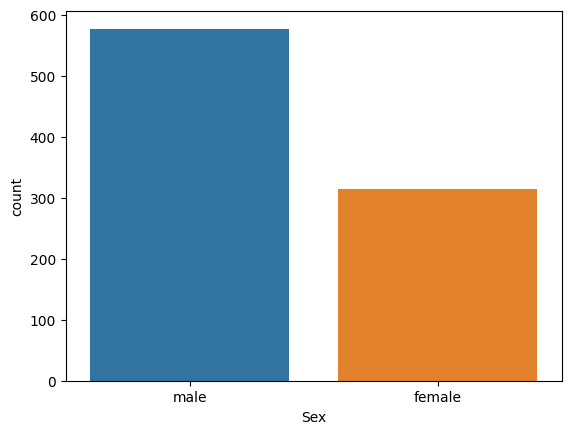

In [18]:
sns.countplot(x='Sex',data=df)
df['Sex'].value_counts()

Le nombre des hommes à bord était clairement supérieur à celui des femmes. Voyons maintenant quel était leur pourcentage de survie :

,Sex,Survived
0,female,0.742038
1,male,0.188908


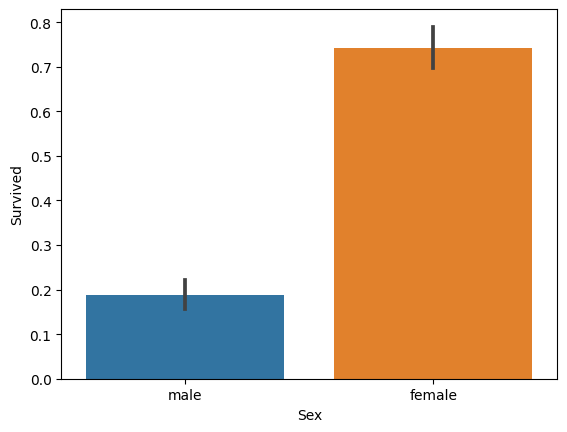

In [264]:
sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex',as_index=False).Survived.mean()

    C/C:  Comme on peut le supposer, le nombre de femmes qui ont survécu était beaucoup plus élevé que celui des hommes, soit 74 % de femmes contre 18 % d'hommes.

**La caractéristique Pclass**

Comment la classe de chaque passager a-t-elle affecté sa survie ?

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


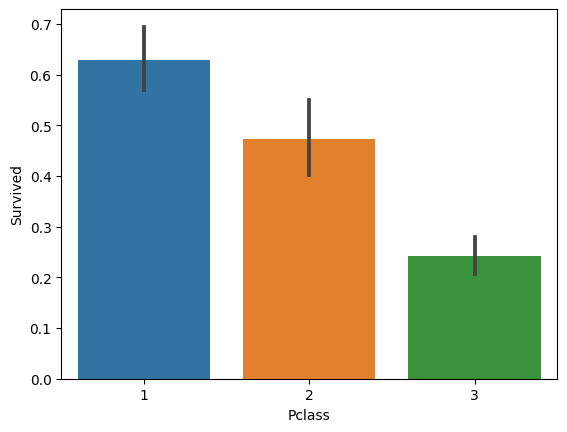

In [19]:
sns.barplot(x='Pclass',y='Survived',data=df)
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

    Il est clair que la classe a eu un effet sur la survie de chaque passager, les pourcentages de survie étant respectivement de 62,96%, 47,28% et 24,23% pour les classes P 1, 2 et 3. Ainsi, l'appartenance à la classe P = 1 présentait un avantage considérable.

**La caractéristique Embarked**

Le port d'embarquement des passagers a-t-il eu un effet sur leur survie ?

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


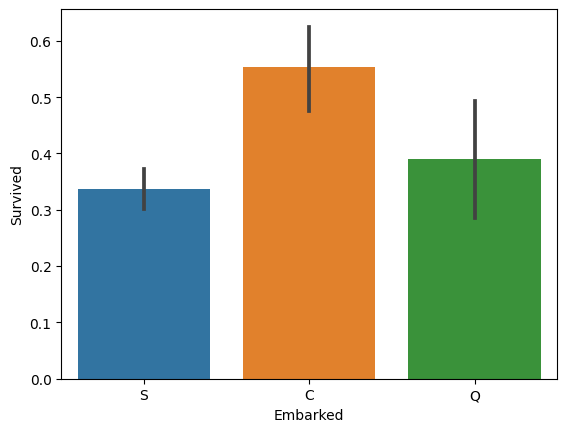

In [20]:
sns.barplot(x='Embarked',y='Survived',data=df)
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

    Il semble que les passagers qui ont embarqué au port de Cherbourg avaient un taux de survie plus élevé (55%). Cela pourrait être dû à leur sexe ou à leur classe socio-économique. Allons plus loin pour voir l'effet de la présence de parents ou d'enfants à bord.

**La caractéristique Parch**


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


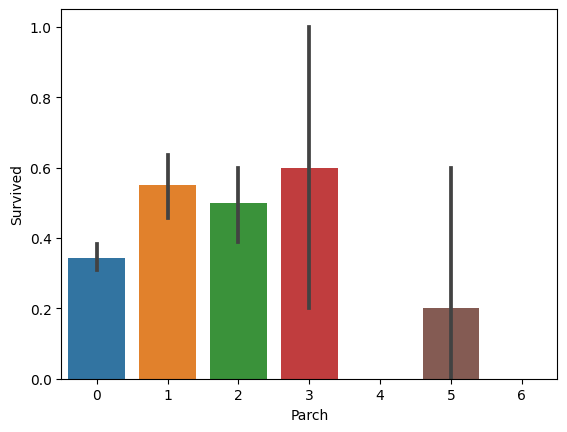

In [21]:

sns.barplot(x='Parch',y='Survived',data=df)
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

    Il semble que les passagers qui avaient soit 1, 2 ou 3 avaient plus de chances de survivre que ceux qui n'en avaient pas. Cependant, avoir plus de 3 passagers rendait cette possibilité encore plus faible. Passons maintenant à l'effet de la présence d'un conjoint ou de frères et sœurs sur la survie :

**La caractéristique SibSp**


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


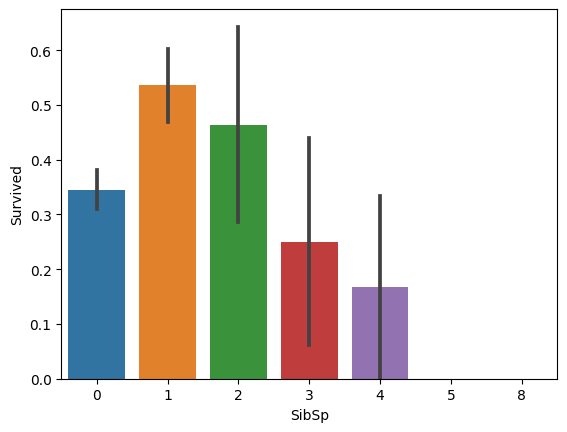

In [22]:
sns.barplot(x='SibSp',y='Survived',data=df)
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

    Il semble que le fait d'avoir un conjoint ou un frère ou une sœur ait un effet positif sur la survie par rapport au fait d'être seul. Bien que les chances de survie diminuent avec le nombre de frères et sœurs après 1.

**La caractéristique Age**


La colonne Age a quelques valeurs manquantes. Nous nous en occuperons plus tard lorsque nous nettoierons nos données d'entraînement. 

Nous allons d'abord procéder comme suit :

1. Tracer un histogramme des valeurs d'âge .
2. examiner la valeur médiane de l'âge ainsi que l'écart.

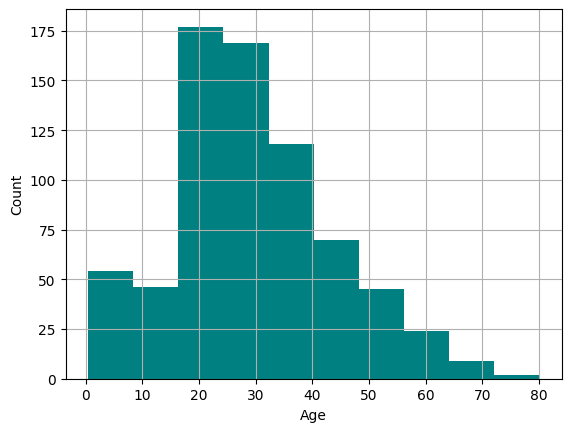

L'âge médian des passagers est de : 28
L'écart-type de l'âge des passagers est de : 14


In [265]:
df.Age.hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("L'âge médian des passagers est de :", int(df.Age.median()))
print("L'écart-type de l'âge des passagers est de :", int(df.Age.std()))

    Il est évident de supposer que les individus plus jeunes avaient plus de chances de survivre, mais nous devons vérifier notre hypothèse avant de poursuivre.



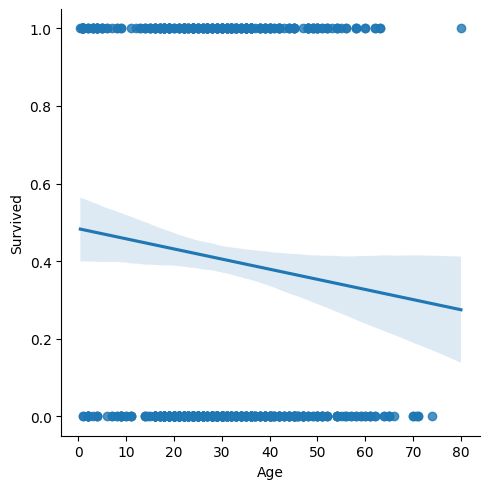

In [24]:
sns.lmplot(x='Age',y='Survived',data=df,palette='Set1')

    Notre hypothèse était juste, les individus plus jeunes avaient plus de chances de survivre.


Dans la colonne "sexe", nous avons vu qu'il y avait une différence significative dans le pourcentage d'hommes et de femmes qui ont survécu. Le sexe joue-t-il un rôle, conjointement avec l'âge, lorsqu'il s'agit de la survie à la catastrophe ?


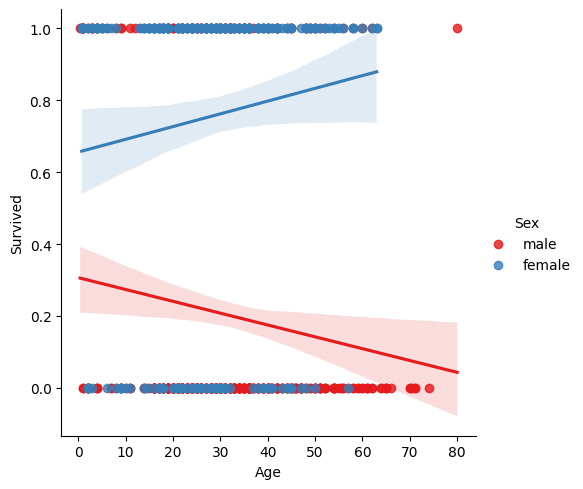

In [25]:
sns.lmplot(x='Age',y='Survived',data=df,hue='Sex',palette='Set1')

    Il est intéressant de noter que l'âge a un effet opposé sur la survie des hommes et des femmes. Les chances de survie augmentent avec l'âge des femmes.
    
    À retenir : La caractéristique de l'âge peut avoir un effet différent sur le résultat selon le sexe du passager. Nous pouvons peut-être utiliser cette information dans l'ingénierie des caractéristiques (feature engineering)

## 2. Nettoyage des données 

Maintenant que nous avons visualisé nos données, nous pouvons remplir les valeurs nulles dans le jeu de données et supprimer les colonnes dont nous n'avons pas besoin.

In [75]:
#let's start off by dropping the coulmns we will not be needing
drop_list=['Cabin','Ticket','PassengerId','Fare','SibSp','Parch', 'Name']

df = df.drop(drop_list,axis=1)

Maintenant, remplissons les valeurs manquantes pour la colonne Embarked dans l'ensemble de données de formation. La plupart des personnes ont embarqué dans leur voyage depuis le port de Southhampton. Par conséquent, on va remplir les deux valeurs manquantes avec "S".

In [76]:
#filling the missing Embarked values in train and test datasets
df.Embarked.fillna('S',inplace=True)

Nous allons remplacer les valeurs nulles de la colonne d'âge par l'âge médian.

In [77]:
#filling the missing values in the Age column
df.Age.fillna(28, inplace=True)

In [78]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


Pclass, Sex et Embarked sont les caractéristiques catégorielles de nos données. Nous pouvons convertir ces variables catégorielles en variables muettes en utilisant la méthode get_dummies en python.

In [79]:
df = pd.get_dummies(df,columns=['Pclass','Sex','Embarked'],drop_first=True)
df.head()

,Survived,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,0,1,1,0,1
1,1,38.0,0,0,0,0,0
2,1,26.0,0,1,0,0,1
3,1,35.0,0,0,0,0,1
4,0,35.0,0,1,1,0,1


Division des données de formation en ensembles de données de formation et de test pour vérifier les performances de notre modèle.

In [80]:
from sklearn.model_selection import train_test_split

#Splitting out training data into X: features and y: target
X = df.drop("Survived",axis=1) 
y = df["Survived"]

#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42)

## 3. Modéle MLP

Notre dataset est à présent nettoyée et prête pour utilisation, nous allons donc pouvoir entraîner
un perceptron multi-couche.

### MLP avec données non standardisées


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

In [70]:
start = time.time()
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(68, 176, 73),random_state=0)
mlp.fit(X_train, y_train)
print(f'Temps d’apprentissage du modèle : {time.time() - start}')
y_pred = mlp.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Temps d’apprentissage du modèle : 0.6748309135437012
Accuracy score : 0.7924263674614306


On obtient un score initial de 79%. 

un GridSearchCV nous permet avec la même architecture d'obtenir les meilleurs paramètres, ce qui augmente notre score à 80%.

In [36]:
params = {
    'hidden_layer_sizes': [(500), (500,100), (68, 176, 73)],
    'activation': ['identity','tanh', 'relu','logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}

In [42]:
grid = GridSearchCV(MLPClassifier(random_state=0),
                 param_grid=params,
                 refit=True, cv=3)

In [43]:
grid.fit(X_train,y_train)

print(grid.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': (68, 176, 73), 'solver': 'adam'}


In [45]:
start = time.time()
mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes= (68, 176, 73), solver= 'adam',random_state=0)
mlp.fit(X_train, y_train)
print(f'Temps d’apprentissage du modèle : {time.time() - start}')
y_pred = mlp.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Temps d’apprentissage du modèle : 0.7041373252868652
Accuracy score : 0.8036465638148668


### MLP avec les données standardisées

Mettons en œuvre la même architecture pour voir si une normalisation aura un impact sur nos résultats.

In [46]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)
start = time.time()
mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes= (68, 176, 73), solver= 'adam',random_state=0)
mlp. fit(X_train_scaler, y_train)
y_pred = mlp.predict(X_test_scaler)
print(f"Temps d’apprentissage du modèle : {time.time() - start}")
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Temps d’apprentissage du modèle : 0.6279728412628174
Accuracy score : 0.8036465638148668


On constate que la standardisation n’a aucun impact sur le score.

## 4. Feature Engineering



Les résultats sont encore insatisfaisants, un effort maximal dans la partie pre-processing pourrait améliorer les résultats de manière significative.


### la caractéristique titre

La colonne des noms peut ne pas nous être directement utile, mais nous constatons que de nombreux noms ont des titres tels que " Mr, Mrs, Lady " qui donnent des informations sur le type de personne du passager, ce qui peut affecter ses chances de survie.

Nous allons essayer d'extraire une caractéristique " Title " de la colonne des noms qui pourrait améliorer les performances de notre modèle.

<AxesSubplot: xlabel='count', ylabel='Title'>

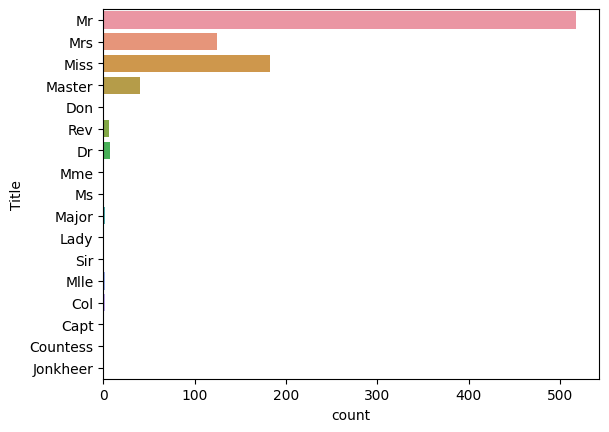

In [240]:
#importing the training and test datasets
df = pd.read_csv('~/Downloads/train.csv')

#extracting the various title in Names column
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#Plotting the various titles extracted from the names    
sns.countplot(y='Title',data=df)  

On peut voir que : 
- Il y a des titres qui sont très rares comme Capt et Lady. Il serait préférable de regrouper ces titres sous un seul nom que l'on appelle 'Special'. 
- Certains titres semblent également être orthographiés différemment. Ils doivent également être rectifiés et regroupés.


In [241]:
#Refining the title feature by merging some titles
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

df['Title'] = df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


Maintenant, voyons la distribution de la caractéristique Title

<AxesSubplot: xlabel='count', ylabel='Title'>

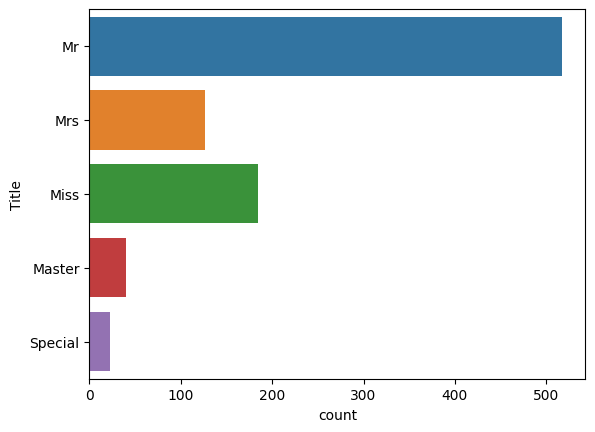

In [242]:
sns.countplot(y='Title',data=df)

Faisons correspondre les noms de Title à des valeurs numériques: 


In [243]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
df['Title'] = df.Title.map(title_mapping)
df['Title'] = df.Title.fillna(0)

### la caractéristique de solitude

Comme nous l'avons observé lors de la visualisation de nos données, être seul sur le Titanic avait un désavantage en matière de survie. 

Nous allons créer une caractéristique IsAlone qui dépend du nombre de membres de la famille qui peut être calculé à partir des colonnes Parch et SibSp.



In [244]:
#Creating a new feature IsAlone from the SibSp and Parch columns
df["Family"] = df['SibSp'] + df['Parch']
df["IsAlone"] = np.where(df["Family"] > 0, 0,1)
df.drop('Family',axis=1,inplace=True)
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


On procéde donc comme dans la partie **Nettoyage des données**, en remplissant les valeurs nulles dans l'ensemble de données et en supprimant les colonnes dont nous n'avons pas besoin.

In [245]:
#let's start off by dropping the coulmns we will not be needing
drop_list=['Cabin','Ticket','PassengerId','Fare','SibSp','Parch', 'Name']
df = df.drop(drop_list,axis=1)

#filling the missing Embarked values in train and test datasets
df.Embarked.fillna('S',inplace=True)

#filling the missing values in the Age column
df.Age.fillna(28, inplace=True)

### Nouvelles caractéristiques liées à l'âge

L'âge joue un rôle important dans la survie. Il est clair que les personnes plus jeunes avaient plus de chances de survivre. Par conséquent, il faudrait envisager une fonction IsMinor pour les passagers de moins de 15 ans.


In [246]:
#Creating another feature if the passenger is a child
df["IsMinor"] = np.where(df["Age"] < 15, 1, 0)

Les passagers féminins plus âgés avaient également plus de chances de survie. Créons une caractéristique appelée Old_female qui prendrait en compte les femmes de plus de 50 ans à bord.

In [247]:
df['Old_Female'] = (df['Age']>50)&(df['Sex']=='female')
df['Old_Female'] = df['Old_Female'].astype(int)

In [248]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone,IsMinor,Old_Female
0,0,3,male,22.0,S,1,0,0,0
1,1,1,female,38.0,C,3,0,0,0
2,1,3,female,26.0,S,2,1,0,0
3,1,1,female,35.0,S,3,0,0,0
4,0,3,male,35.0,S,1,1,0,0


Enfin, comme précédemment, nous uniformisons nos variables catégorielles en utilisant la méthode get_dummies en python.

In [249]:
df = pd.get_dummies(df,columns=['Pclass','Sex','Embarked'],drop_first=True)
df.head()

,Survived,Age,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,0,0,1,1,0,1
1,1,38.0,3,0,0,0,0,0,0,0,0
2,1,26.0,2,1,0,0,0,1,0,0,1
3,1,35.0,3,0,0,0,0,0,0,0,1
4,0,35.0,1,1,0,0,0,1,1,0,1


Évaluons à nouveau notre modèle avec les attributs nouvellement ajoutés :

In [259]:
from sklearn.model_selection import train_test_split
#Splitting out training data into X: features and y: target
X = df.drop("Survived",axis=1) 
y = df["Survived"]

#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42)

In [260]:
start = time.time()
mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes= (68, 176, 73), solver= 'adam',random_state=0)
mlp.fit(X_train, y_train)
print(f"Temps d’apprentissage du modèle : {time.time() - start}")
y_pred = mlp.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Temps d’apprentissage du modèle : 0.6138498783111572
Accuracy score : 0.856339410939691
